**Note**:

- This notebook implements method of least squares from scratch
- User has been provided with a toy data set of `User Count ` vs `Amount of Food consumed(kg)`
- As understood from the problem statement: **Amount of Food consumed ($y$) = some weight parameter($w$) * User Count($X$) + bias($b)$**
- Implement the method least square to fit a straight line through the function:
    > $f(x)$ = some weight parameter * $X$ + $bias$ (Note: eq. of a straight line: $y = mx +b $)
- Loss function = mean squared error = ($\hat{y}$ - $y$)$^2$/Count_of_observations
- _2 examples had been provided:_
    * Calculating slope only (i.e. weight) -> $\hat{y}$ = $X*w$
    * Calculating slope and itercept (i.e. weight and bias) -> $\hat{y}$ = $X*w$ + $b$

### Calculating slope only (i.e. weight)

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv("food_trend.txt",sep="\s+")

In [49]:
data.head()

,Cnt_of_users,Amount_of_food
0,13,33
1,2,16
2,14,32
3,23,51
4,13,27


In [50]:
X = data["Cnt_of_users"]
y = data["Amount_of_food"]

Text(0.5, 1.0, 'Scatterplot displaying Cnt_of_users vs Amount_of_food consumed')

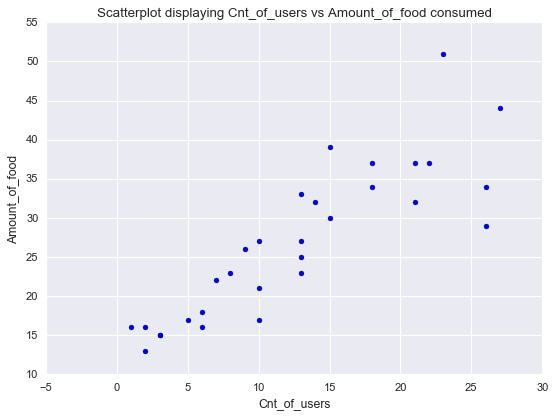

In [51]:
plt.style.use('seaborn')
plt.scatter(X,y)
plt.xlabel("Cnt_of_users")
plt.ylabel("Amount_of_food")
plt.title("Scatterplot displaying Cnt_of_users vs Amount_of_food consumed")

In [52]:
def predict(X,w):
    return (X*w)

def loss(X,y,w):
    pred_out = np.average((y - predict(X,w)) ** 2)
    #print(pred_out)
    return pred_out
    
    

In [53]:
def train(X,y,iterations = 10000, lr=0.01):
    w = 0 
    lst_wt = []
    lst_loss = []
    for cnt in range(iterations):
        cur_loss = loss(X,y,w)
        lst_wt.append(w)
        lst_loss.append(cur_loss)
        #print(f"Iteration:{cnt +1} weight value:{w} current loss:{cur_loss}")
        
        if loss(X,y,w+lr) < cur_loss:
            w +=lr
        elif loss(X,y,w-lr) < cur_loss: 
            w -=lr
            
        else:
            print(f"Convergence at:Iteration:{cnt +1} with weight value:{w} and loss at:{cur_loss}")
            plt.title("Weight vs Loss plot")
            plt.scatter(lst_wt,lst_loss)
            plt.xlabel("Weights")
            plt.ylabel("Loss")
            plt.show()
            return w       
    
    raise Exception(f"Couldn't converge within {iterations} iterations")

Convergence at:Iteration:185 with weight value:1.8400000000000014 and loss at:69.12394666666667


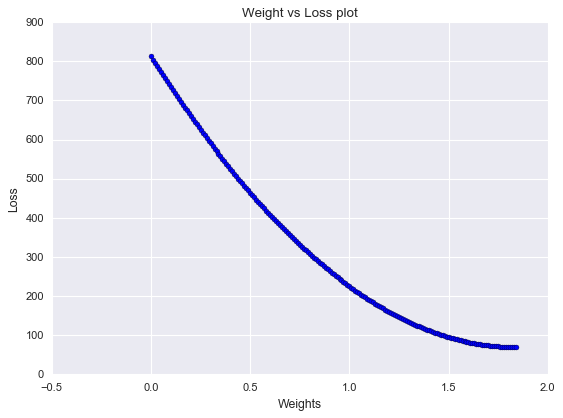

The weight obtained from the training phase is: 1.8400000000000014


In [54]:
wt = train(X,y,lr=0.01)
print(f"The weight obtained from the training phase is: {wt}")

Scatter plot with the fitted line having slope(weight)=1.8400000000000014


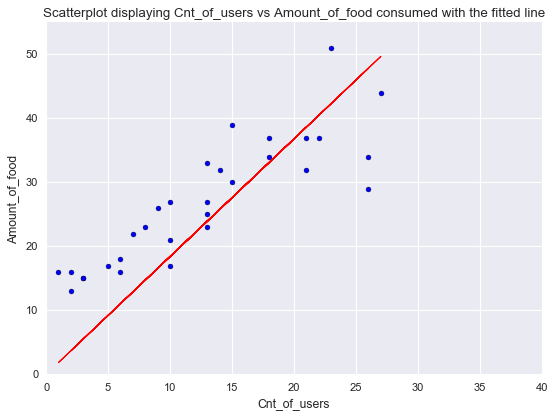

In [55]:
print(f"Scatter plot with the fitted line having slope(weight)={wt}")
plt.scatter(X,y)
plt.axis([0, 40, 0, 55])
plt.plot(X, predict(X, 1.840), linewidth=1.0, color="red")
plt.xlabel("Cnt_of_users")
plt.ylabel("Amount_of_food")
plt.title("Scatterplot displaying Cnt_of_users vs Amount_of_food consumed with the fitted line")
plt.show()

#### Points to note:
- The overall loss looks pretty high (~ 70%)
- We can do a better fit
- Let's add a bias term in the mix(`b` in the equation: y = mx + b)

### Calculating slope and intercept (i.e. weight and bias)

In [56]:
def predict_v2(X,w,b):
    return ((X*w)+b)

def loss_v2(X,y,w,b):
    pred_val = (y - predict_v2(X,w,b))**2
    return np.average(pred_val)

In [57]:
def train_v2(X,y,iteration = 10000, lr = 0.01):
    w = 0
    b = 0
    lst_wt = []
    lst_loss = []
    
    for cnt in range(iteration):
        cur_loss = loss_v2(X,y,w,b)
        lst_wt.append(w)
        lst_loss.append(cur_loss)
        
        if loss_v2(X,y,w+lr,b) < cur_loss:
            w +=lr
        elif loss_v2(X,y,w-lr,b) < cur_loss:    
            w -=lr
        elif loss_v2(X,y,w,b+lr) < cur_loss:    
            b +=lr
        elif loss_v2(X,y,w,b-lr) < cur_loss:  
            b -=lr
        else:
            print(f"Convergence at:Iteration:{cnt +1} with weight value:{w},bias:{b} and loss at:{cur_loss}")
            plt.title("Weight vs Loss plot - V2")
            plt.scatter(lst_wt,lst_loss)
            plt.xlabel("Weights")
            plt.ylabel("Loss")
            plt.show()
            return w,b       
    raise Exception(f"Couldn't converge within {iterations} iterations")

Convergence at:Iteration:1552 with weight value:1.1000000000000008,bias:12.929999999999769 and loss at:22.86356666666666


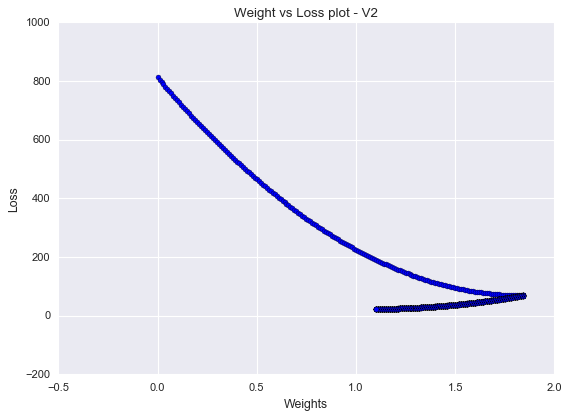

Weight: 1.1000000000000008 and bias: 12.929999999999769 has been obtained from the training phase 


In [58]:
wt_2,b = train_v2(X,y,lr=0.01)
print(f"Weight: {wt_2} and bias: {b} has been obtained from the training phase ")

Scatter plot with the fitted line having slope(weight)=1.1000000000000008 and intercept(bias)=12.929999999999769


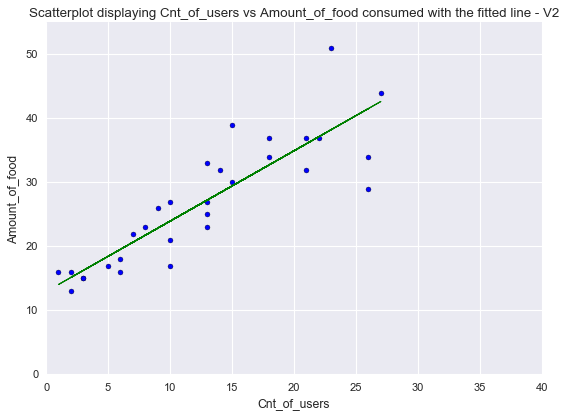

In [59]:
print(f"Scatter plot with the fitted line having slope(weight)={wt_2} and intercept(bias)={b}")
plt.scatter(X,y)
plt.axis([0, 40, 0, 55])
plt.plot(X, predict_v2(X,wt_2,b), linewidth=1.0, color="green")
plt.xlabel("Cnt_of_users")
plt.ylabel("Amount_of_food")
plt.title("Scatterplot displaying Cnt_of_users vs Amount_of_food consumed with the fitted line - V2")
plt.show()

### As observed:
- Adding the bias has caused the loss to decrease from nearly 70% to approx 23%
- The 2nd line fits better